# <center> <U>Advanced Regression</U> </center>
### Assignment: House Price Prediction

<div class="alert alert-block alert-danger">
<b>Problem Statement:</b> A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
</div>

<div class="alert alert-block alert-warning">
<b>Business objective:</b> The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br> 
    
    
<b>The housing company i.e., Surprise Housing wants to know the following:</b><br>
    - Which variables are significant in predicting the price of a house <br>
    - How well those variables describe the price of a house.<br>
    - Also, determine the optimal value of lambda for ridge and lasso regression.    
</div>

**<h3><u>Assignment Steps:</u></h3>**

**1.Data Understanding and Exploration**<br>
**2.Data Transformation**   
**3.Data Visualization**<br>
>Perform EDA to understand various variables.<br>
>Check the correlation between the variables.   

**4.Data Preparation**<br>
>Create dummy variables for all the categorical features.<br>
>Divide the data to train & Test.<br>
>Perform Scaling as required.<br>
>Divide data into dependent & Independent variables.
    
**5.Data Modelling & Evaluation**<br>
>Create Linear Regression model using mixed approach (RFE & VIF/p-value).<br>
>Validate the various assumptions of Linear Regression.<br>
>Check the Adjusted R-Square for both train & Test data.<br>
>Adopt Advanced Regresssion models such as Ridge or Lasso.
>Report the final model,appropriate Lamda Value

<div class="alert alert-block alert-info">
<b>MOHAMMED RAHAMATHULLA</b><br>
iiitB and upGrad Executive PG Programme<br>
Machine Learning & Artificial Intelligence <br>
mohammedrahmat@gmail.com <br>
</div>

### 1. Data Understanding and Exploration

`Let's import data as provided by Surprise Housing and have a look at the dataset and understand the attributes.`
`Also, import various libraries which are required throughout this assignemnt. After this step we should`
`be having a stable understanding of Surpise Housing data.`

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import linear_model

%matplotlib inline

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
house = pd.read_csv(r"C:\Users\Admin\Desktop\train.csv")

In [137]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
house.shape

(1460, 81)

In [139]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [140]:
house.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [141]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<div class="alert alert-block alert-warning">
The Surpise Housing dataset contains : 1460 entries (rows), 81 variables\features (Data columns). The dataset is relatively wider as there are several features related to housing domain are taken into consideration. Further assessment would provide a rationale to narrow the scope with justification such as RFE and manual review.Let us further evaluate the data and take necessary data preparation actions.
</div>

### 3. Data Visualisation

Data visualization is the most important step as far as **Data Understadning** is concenred.
- Visualize Numerical Variables
- Visualize Categorical Variables
- Attempt to spot any multicolinearity, predictors strength etc..

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

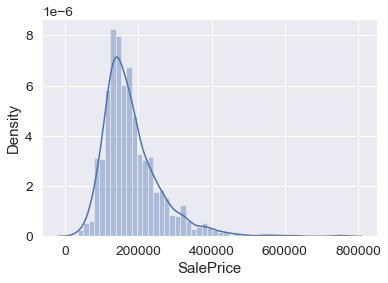

In [142]:
#TARGET FEATURE: Let us have an initial look and feel of the target feature i.e., SalePrice of the house.
sns.distplot(house['SalePrice'])

##### The initial look at SalePrice appears to be left skewed. We can handle this in data transformation section below with the help of Log or Exponential transformation for a reasonable represenation.

Skewness: 1.8828
Kurtusis: 6.5362

In [143]:
# NON-TARGET FEATURES: Now, let's have a visual look at other features in Surprise Housing dataset.
# We can look at Numerical features and categorical features correlation either combined or independent as needed.
# Based on the correlation feedback, let's us extended assessment on some key feautres.

In [144]:
house.shape

(1460, 81)

In [145]:
num_vars = house.select_dtypes(['int64','float64'])
cat_vars = house.select_dtypes(exclude=['float64','datetime64','int64'])

print("Numerical Variables: 38 of 81 Data Columns \n")
print(num_vars.columns)
print()
print("Categorical Variables: 43 of 81 Data Columns \n")
print(cat_vars.columns)

Numerical Variables: 38 of 81 Data Columns 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical Variables: 43 of 81 Data Columns 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
     

### Univariate Analysis - Numerical Variables
##### There are 38 of 81 Num Vars, let us have a look at some of features which are common across geographies including Australia.

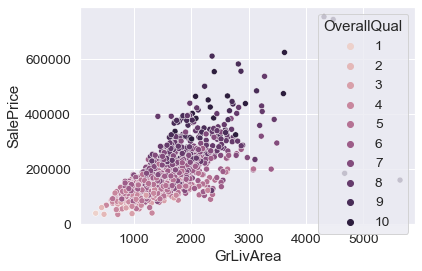

In [146]:
sns.scatterplot(data=house, 
                x="GrLivArea", 
                y="SalePrice", 
                hue='OverallQual',  
                sizes=(30, 150), 
                legend="full")
plt.show()

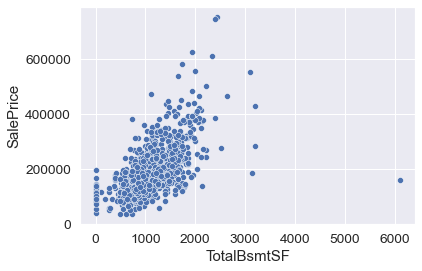

In [147]:
sns.scatterplot(data=house, 
                x="TotalBsmtSF", 
                y="SalePrice",             
                sizes=(30, 150), 
                legend="full")
plt.show()

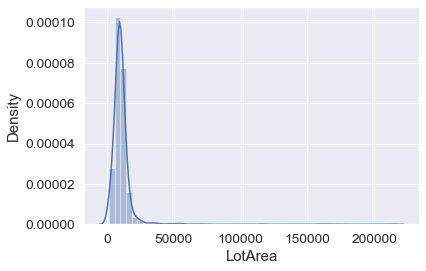

In [148]:
sns.distplot(house['LotArea'])
plt.show()

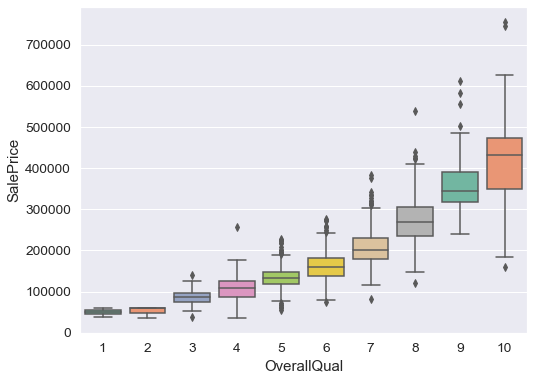

In [149]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=house["OverallQual"],y=house['SalePrice'],orient="v", palette="Set2")

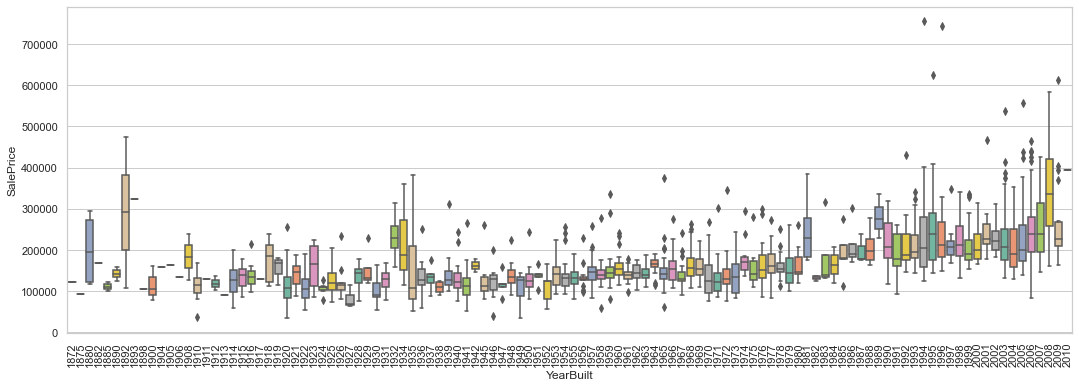

In [150]:
f, ax = plt.subplots(figsize=(18, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=house["YearBuilt"],y=house['SalePrice'],orient="v", palette="Set2")
plt.xticks(rotation=90);

### Bivariate Analysis - Categorical Variables

'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

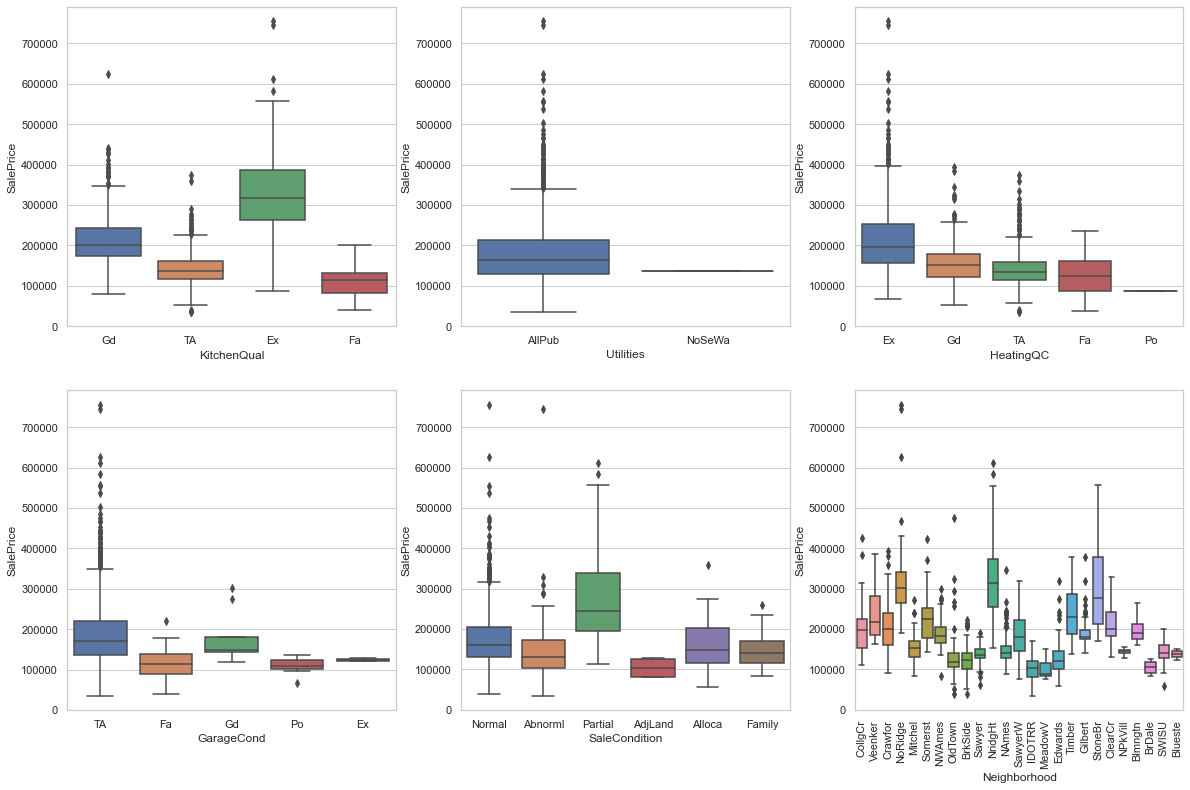

In [151]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house)
plt.subplot(3,3,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house)
plt.subplot(3,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house)
plt.subplot(3,3,5)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house)
plt.subplot(3,3,6)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house)
plt.xticks(rotation=90);
plt.show()

### Bivariate Analysis - Numerical Variables
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

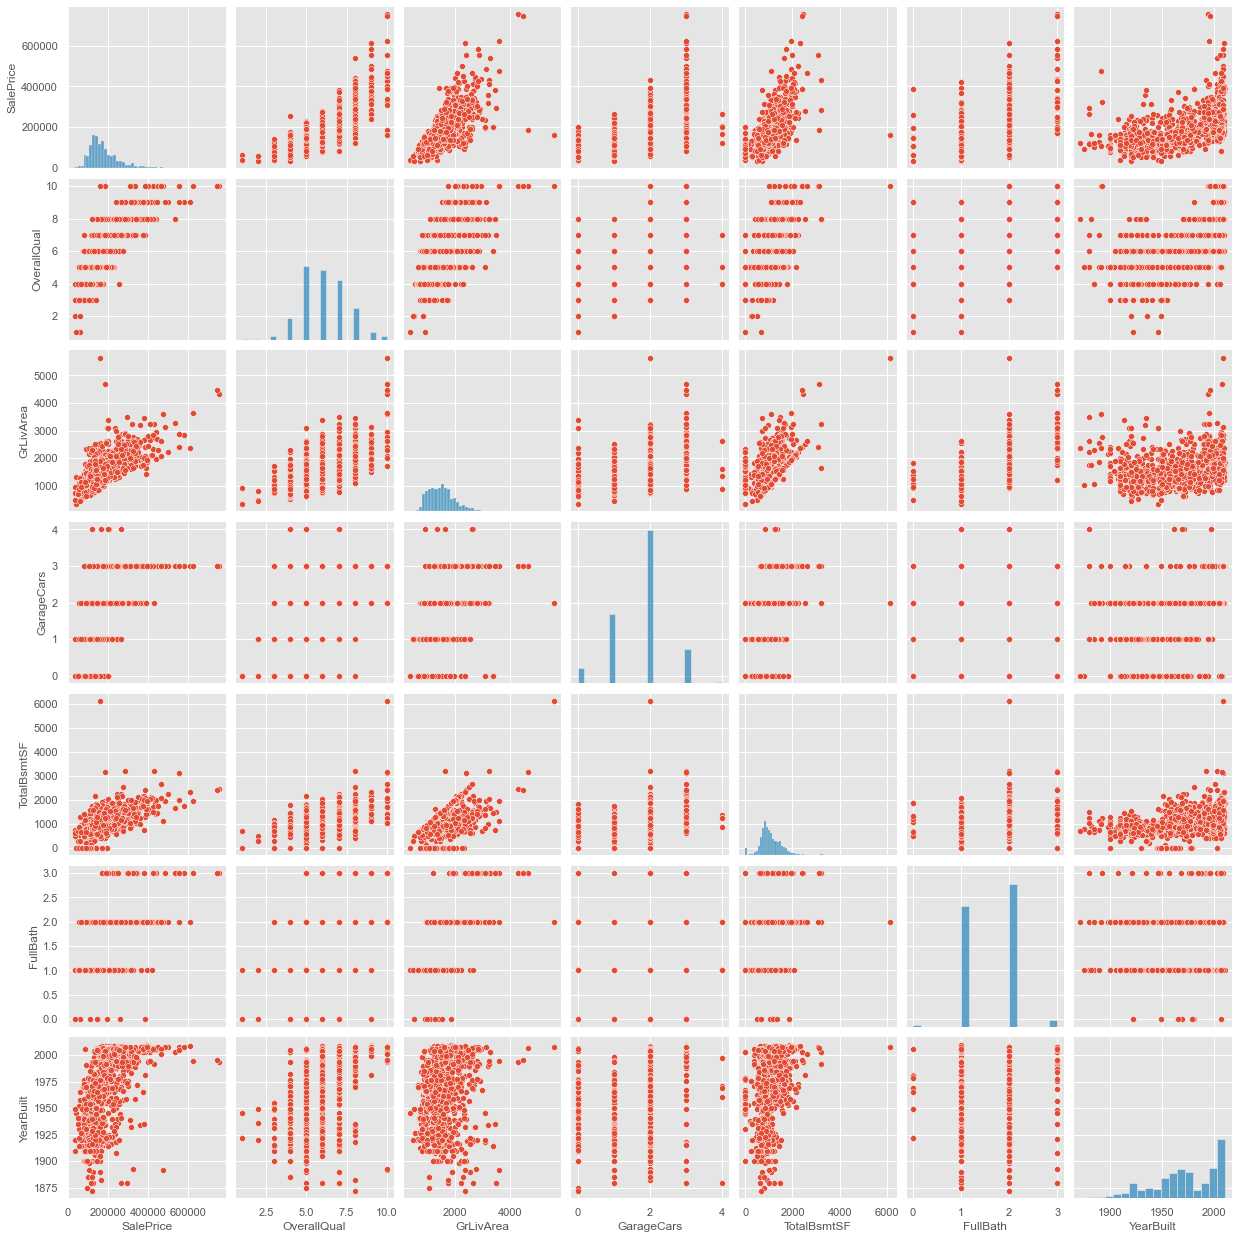

In [152]:
subset_numvars = house[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
plt.style.use('ggplot')
sns.pairplot(subset_numvars)
plt.show()

### Multivariate Analysis - Numerical Variables

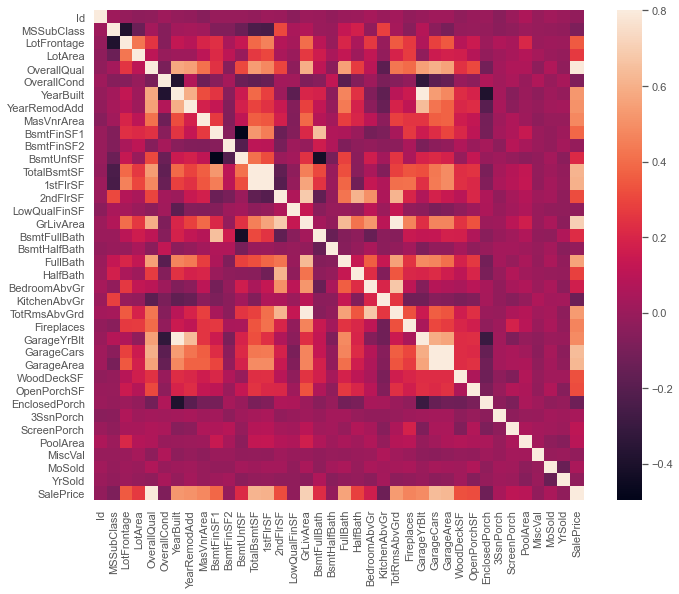

In [153]:
corrmatrix = num_vars.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

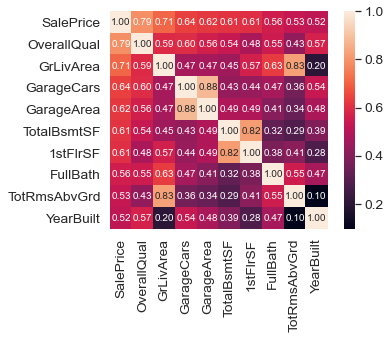

In [154]:
k = 10 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 3. Data Preparation 

In [155]:
# Handling missing data, let us individually look at the Null values in each feature and corresponding percentages.
total_missing_cnt = house.isnull().sum().sort_values(ascending=False)
total_missing_prc = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cnt, total_missing_prc], axis=1, keys=['total_missing_cnt', 'total_missing_prc'])
missing_data.head(20)

,total_missing_cnt,total_missing_prc
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [156]:
# Not NaN in Disguise as NULL -- We need to ideintify and treat these.
# There are several variables which have null but those have a meaning in the context of recorded data.
# Therefore, we need to fill those NULL with None to treat it a new category or piece of information.

null_vars = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_vars:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

In [157]:
total_missing_cnt = house.isnull().sum().sort_values(ascending=False)
total_missing_prc = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cnt, total_missing_prc], axis=1, keys=['total_missing_cnt', 'total_missing_prc'])
missing_data.head(10)

,total_missing_cnt,total_missing_prc
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000


In [158]:
house.drop("LotFrontage", axis=1, inplace=True) # Dropping this feature as it has lot of Null values

In [159]:
total_missing_cnt = house.isnull().sum().sort_values(ascending=False)
total_missing_prc = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cnt, total_missing_prc], axis=1, keys=['total_missing_cnt', 'total_missing_prc'])
missing_data.head(5)

,total_missing_cnt,total_missing_prc
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [160]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [161]:
total_missing_cnt = house.isnull().sum().sort_values(ascending=False)
total_missing_prc = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cnt, total_missing_prc], axis=1, keys=['total_missing_cnt', 'total_missing_prc'])
missing_data.head(5)

,total_missing_cnt,total_missing_prc
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [162]:
house.dropna(inplace=True) # single row with NA, let's drop it.

In [163]:
total_missing_cnt = house.isnull().sum().sort_values(ascending=False)
total_missing_prc = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_cnt, total_missing_prc], axis=1, keys=['total_missing_cnt', 'total_missing_prc'])
missing_data.head(10)

,total_missing_cnt,total_missing_prc
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [164]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

# Data Preparation

Ok, now that we have dealt with all the missing values, it looks like it's time for some feature engineering, the second part of our data preprocessing. We need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

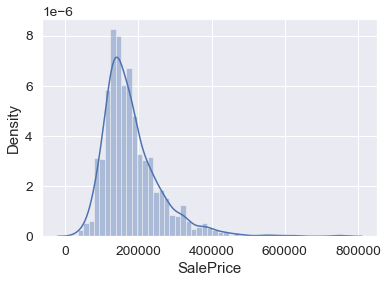

In [165]:
sns.distplot(house["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

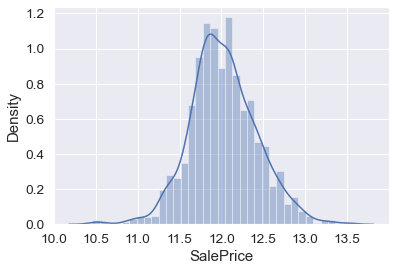

In [166]:
sns.distplot(np.log(house["SalePrice"]))

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [167]:
house["LogPrice"] = np.log(house["SalePrice"])

In [168]:
for i in cat_vars:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [169]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
0,1,60,4,8450,0,0,3,0,0,2,...,0,1,1,0,2,2008,8,4,208500,12.247694
1,2,20,4,9600,0,0,3,0,0,4,...,0,1,1,0,5,2007,8,4,181500,12.109011
2,3,60,4,11250,0,0,1,0,0,2,...,0,1,1,0,9,2008,8,4,223500,12.317167
3,4,70,4,9550,0,0,1,0,0,1,...,0,1,1,0,2,2006,8,0,140000,11.849398
4,5,60,4,14260,0,0,1,0,0,4,...,0,1,1,0,12,2008,8,4,250000,12.429216


# Model Building

In [170]:
df_train,df_test = train_test_split(house,train_size=0.7,test_size=0.3,random_state=42)

In [171]:
house[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,1,3,2,0,4,4,0,1,1,3,3,0,0,0,3
1,1,0,2,0,1,2,0,1,1,0,3,0,0,0,3
2,1,3,2,0,0,4,0,1,1,3,3,0,0,0,1
3,1,0,0,1,4,2,0,2,1,3,0,0,0,0,1
4,1,3,2,0,3,4,0,1,1,3,3,0,0,0,1


In [172]:
#Scaling the datasets using MinMaxScaler

num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

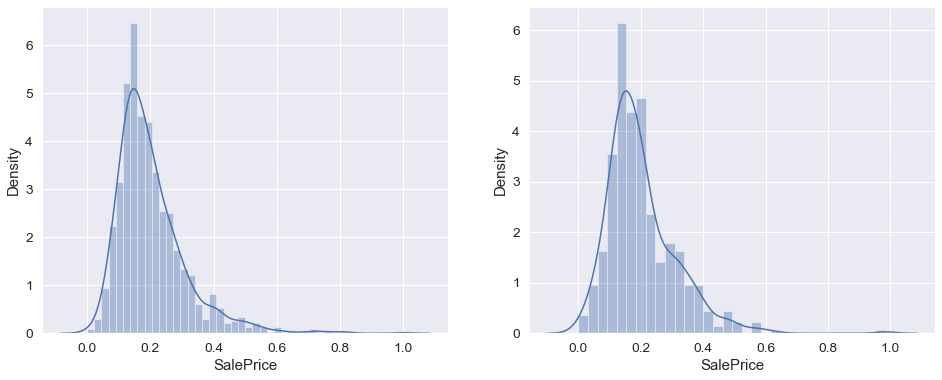

In [173]:
#Train and Test dataset distirbution 

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [174]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [175]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [176]:
len(X_train.columns)

80

## Linear Regression - Feature Selection through RFE

In [177]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [178]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [179]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [180]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

# Lasso Regression Model

In [181]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9255591058661629
0.9044236043134963


In [182]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('Id', -3.269),
 ('MSSubClass', -0.0),
 ('MSZoning', -0.003),
 ('LotArea', 0.0),
 ('Street', -0.0),
 ('Alley', -0.0),
 ('LotShape', 0.0),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LotConfig', -0.0),
 ('LandSlope', -0.0),
 ('Neighborhood', -0.0),
 ('Condition1', -0.001),
 ('Condition2', -0.001),
 ('BldgType', 0.0),
 ('HouseStyle', -0.0),
 ('OverallQual', -0.004),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', -0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.005),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.001),
 ('MasVnrType', 0.001),
 ('MasVnrArea', -0.001),
 ('ExterQual', 0.003),
 ('ExterCond', -0.003),
 ('Foundation', 0.0),
 ('BsmtQual', -0.0),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', -0.005),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.

## Optimal value of alpha using GridSearchCV

In [183]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [184]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.008079,0.002502,0.002492,0.000669,0.001,{'alpha': 0.001},0.864527,0.949809,0.933049,0.941580,...,0.926521,0.925512,0.927674,0.927388,0.924640,0.923059,0.924389,0.926101,0.926210,0.002413
1,0.007078,0.001632,0.002293,0.000637,0.010,{'alpha': 0.01},0.777836,0.878507,0.872147,0.898106,...,0.847827,0.848592,0.845310,0.844785,0.847370,0.843447,0.845684,0.847653,0.846893,0.002130
2,0.006882,0.001042,0.002293,0.000457,0.100,{'alpha': 0.1},-0.008161,0.035752,0.029576,0.044054,...,0.023639,0.018129,0.024103,0.026007,0.023691,0.020696,0.021826,0.031330,0.024895,0.005504
3,0.006280,0.001181,0.002094,0.000299,1.000,{'alpha': 1.0},-0.000902,-0.001152,-0.000234,-0.000085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.006585,0.001197,0.002392,0.000488,5.000,{'alpha': 5.0},-0.000902,-0.001152,-0.000234,-0.000085,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


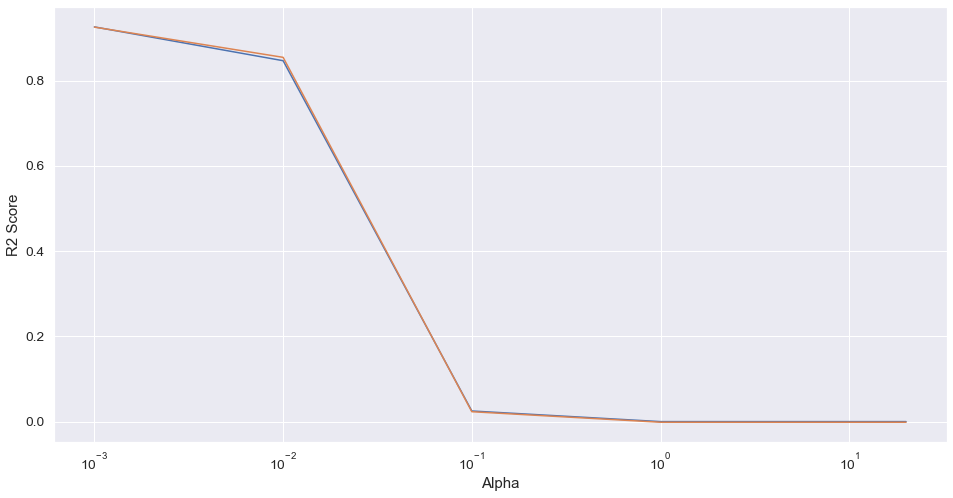

In [212]:
plt.figure(figsize=(16,8))

plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])

plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')

plt.show()

In [186]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [187]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9255591058661629
0.9044236043134963


In [188]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [189]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
70,PoolArea,0.274697
21,RoofMatl,0.005359
52,KitchenQual,0.003871
26,ExterQual,0.002854
55,Fireplaces,0.002085
56,FireplaceQu,0.001564
23,Exterior2nd,0.001399
24,MasVnrType,0.000843
36,BsmtUnfSF,0.000448
18,YearBuilt,0.000137


<div class="alert alert-block alert-success">
<H3> Lasso (Best Alpha) : {0.001} </H3>
<div>

## Ridge Regression Model

In [220]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.9448607746935426
0.9142867690240039


## Optimal value of alpha using GridSearchCV

In [191]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [192]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006582,0.001621,0.002294,6.399656e-04,0.001,{'alpha': 0.001},0.872909,0.951305,0.801343,0.753081,...,0.947977,0.946482,0.946703,0.945044,0.946167,0.943553,0.943668,0.945605,0.946113,0.002391
1,0.006084,0.001042,0.002293,7.794090e-04,0.010,{'alpha': 0.01},0.872931,0.951358,0.846884,0.763230,...,0.947838,0.946477,0.946702,0.945042,0.946165,0.943551,0.943666,0.945603,0.946098,0.002381
2,0.005086,0.000299,0.001994,3.568323e-07,0.100,{'alpha': 0.1},0.873179,0.951649,0.913808,0.805620,...,0.946595,0.946361,0.946653,0.944970,0.946080,0.943481,0.943584,0.945521,0.945902,0.002321
3,0.005286,0.000639,0.002194,5.984785e-04,0.200,{'alpha': 0.2},0.873424,0.951798,0.919989,0.820057,...,0.946180,0.946258,0.946585,0.944882,0.945975,0.943389,0.943483,0.945413,0.945775,0.002314
4,0.005485,0.000668,0.001994,1.459815e-06,0.500,{'alpha': 0.5},0.873759,0.951970,0.923896,0.834327,...,0.945719,0.945998,0.946358,0.944640,0.945680,0.943118,0.943213,0.945099,0.945485,0.002309


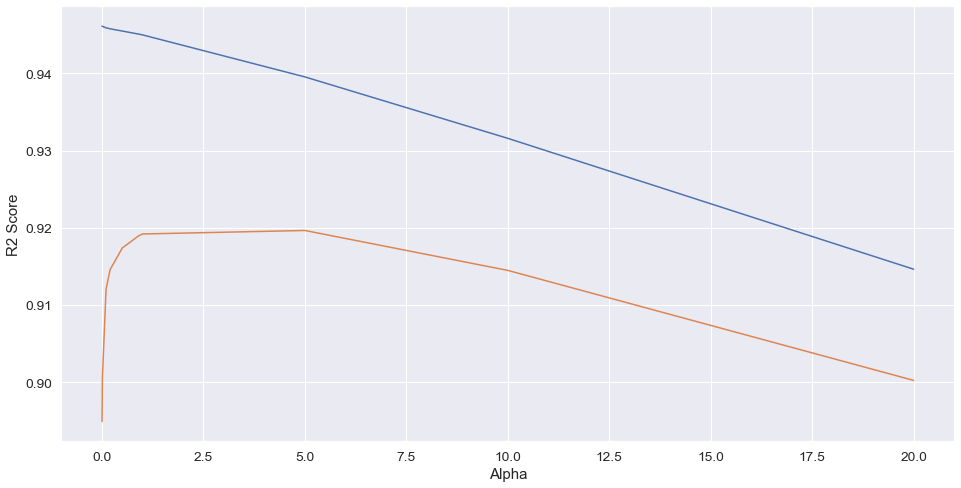

In [209]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [210]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [195]:
ridge = Ridge(alpha = 0.9)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9441464114942906
0.9111451258227188


In [196]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [197]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
70,PoolArea,0.263499
21,RoofMatl,0.083870
48,FullBath,0.036406
28,Foundation,0.024652
14,BldgType,0.023356
38,Heating,0.020619
32,BsmtFinType1,0.019441
3,LotArea,0.019208
62,GarageQual,0.017687
40,CentralAir,0.016242


In [198]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9255591058661629
0.9044236043134963


<div class="alert alert-block alert-success">
<H3>Ridge (Best Alpha): {5.0}</H3>
</div>

Conclusion :
From the above analysis we can reach the following conclusion about different regularization methods:

- Regularization is used to reduce the dependence on any particular independent variable by adding the penalty term to the Loss function. This term prevents the coefficients of the independent variables to take extreme values.
- Ridge Regression adds L2 regularization penalty term to loss function. This term reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely. It can be used to measure the impact of the different independent variables.
- Lasso Regression adds L1 regularization penalty term to loss function. This term reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely. It can be used for feature selection etc.